# **Kütüphaneler**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

# **Dosyayı Oku**

In [2]:
df=pd.read_csv('heart_final.csv')
df.head()

,HeartDisease,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,...,DiffWalking_No,DiffWalking_Yes,PhysicalActivity_No,PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,BMI_log
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.563471
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.904681
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.421973
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.451810
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.487914


# **Model Eğitimi ve Sonuçlar**

In [3]:
X=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Eğitim süresi:  0.22160601615905762
Test süresi:  0.006459474563598633
[[753 259]
 [195 793]]
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77      1012
         1.0       0.75      0.80      0.78       988

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



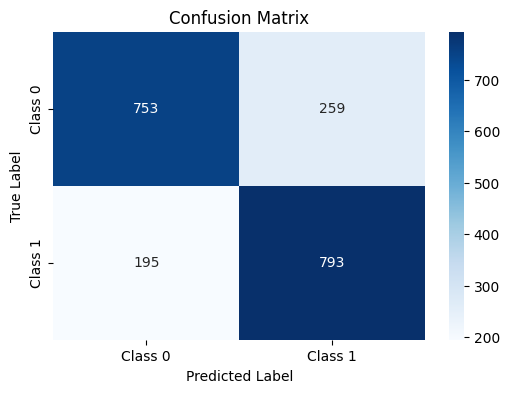

In [4]:
lg=LogisticRegression(C=20,max_iter=1000)

start_train=time.time()
lg.fit(X_train,y_train)
end_train=time.time()

start_test=time.time()
y_pred=lg.predict(X_test)
end_test=time.time()

print('Eğitim süresi: ',end_train-start_train)
print('Test süresi: ',end_test-start_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()